In [34]:
# EE016 Project – NBA Archetype Classification

#Team: Michael Zita, Justin Zhu, Peter Hsia
#GitHub Repository: https://github.com/phsia006-pixel/Homework-File



In [35]:
# 1. Data Loading and Cleaning


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

csv_path = "/content/DataSheet"
df = pd.read_csv(csv_path)


df.columns = df.columns.str.strip()
df = df[[c for c in df.columns if not c.startswith("Unnamed")]]

primary_cols = [c for c in df.columns if "Primary" in c]
primary_col = primary_cols[0]
print("Primary archetype column:", primary_col)

df[primary_col] = df[primary_col].astype(str).str.strip()
df = df[(df[primary_col] != primary_col) & (df[primary_col] != "nan")]

print("Unique archetypes after cleaning:\n", df[primary_col].unique())



Primary archetype column: Primary Archetype
Unique archetypes after cleaning:
 ['Playmaker' 'Midrange Specialist' 'Slasher' 'Two Way'
 '3-Point Specialist' 'Defensive Anchor (Paint)' 'Shot Creator'
 'Stretch 5' 'Defensive Playmaker (Perimeter)' '3-Level Scorer'
 'Defensive Playmaker']


In [37]:
# 2. Correlation Analysis


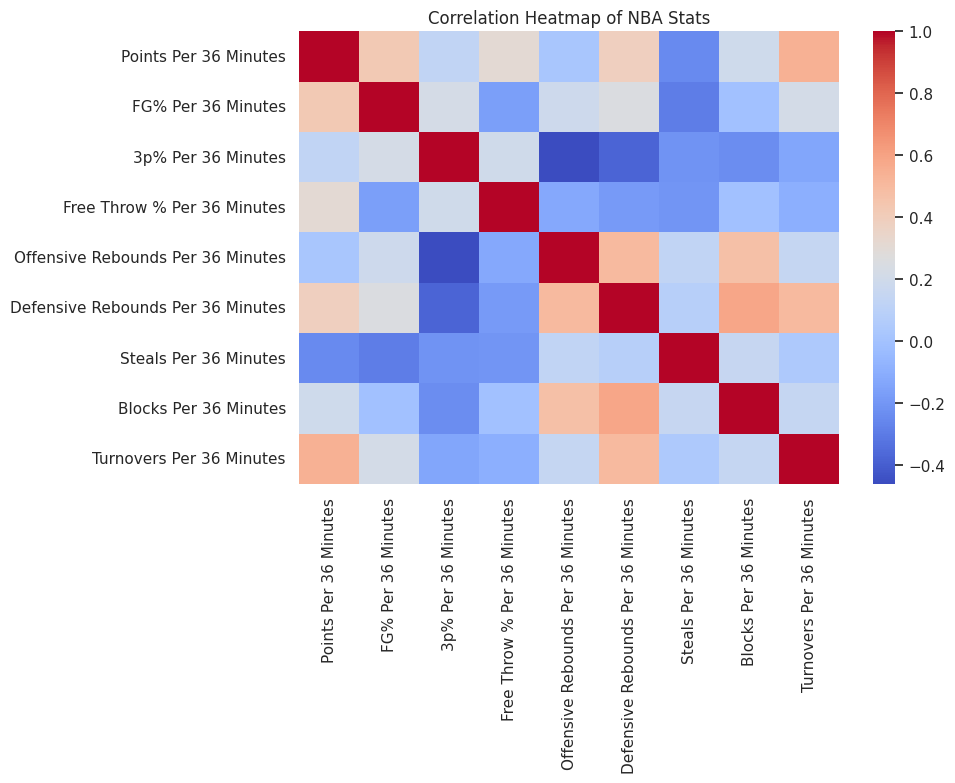

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    "Points Per 36 Minutes",
    "FG% Per 36 Minutes",
    "3p% Per 36 Minutes",
    "Free Throw % Per 36 Minutes",
    "Offensive Rebounds Per 36 Minutes",
    "Defensive Rebounds Per 36 Minutes",
    "Steals Per 36 Minutes",
    "Blocks Per 36 Minutes",
    "Turnovers Per 36 Minutes"
]

corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of NBA Stats")
plt.tight_layout()
plt.show()


Arch profile head:
                                  Points Per 36 Minutes  FG% Per 36 Minutes  \
Primary Archetype                                                            
3-Level Scorer                                0.644228           -0.377782   
3-Point Specialist                           -0.324348            0.392994   
Defensive Anchor (Paint)                      0.006850           -0.343976   
Defensive Playmaker                           0.447654            1.062353   
Defensive Playmaker (Perimeter)               0.036634            0.109024   

                                 3p% Per 36 Minutes  \
Primary Archetype                                     
3-Level Scorer                            -0.474156   
3-Point Specialist                        -0.533051   
Defensive Anchor (Paint)                  -0.677743   
Defensive Playmaker                        1.663501   
Defensive Playmaker (Perimeter)           -0.735910   

                                 Free Throw % P

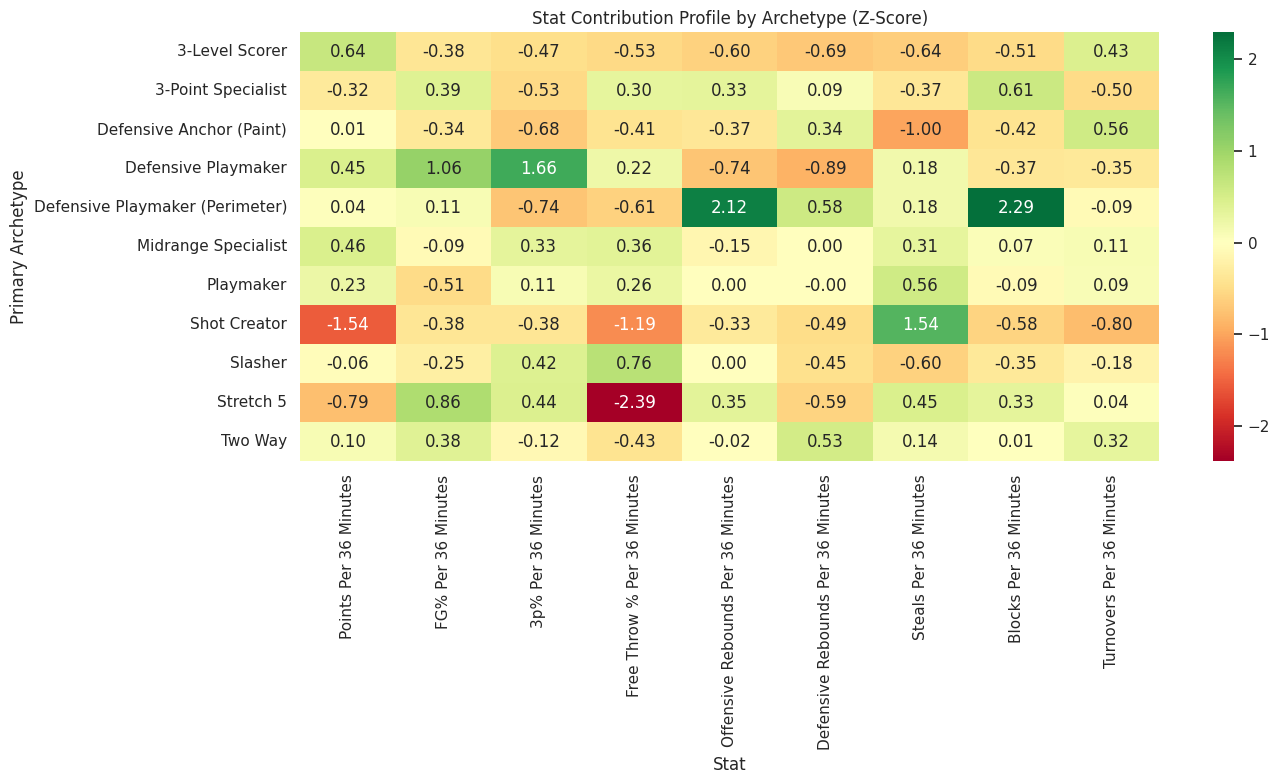

In [39]:
stats = [
    "Points Per 36 Minutes",
    "FG% Per 36 Minutes",
    "3p% Per 36 Minutes",
    "Free Throw % Per 36 Minutes",
    "Offensive Rebounds Per 36 Minutes",
    "Defensive Rebounds Per 36 Minutes",
    "Steals Per 36 Minutes",
    "Blocks Per 36 Minutes",
    "Turnovers Per 36 Minutes"
]
z_df = df.copy()

for s in stats:
    z_df[s] = pd.to_numeric(df[s], errors="coerce")

z_df = df.copy()

for s in stats:
    col = z_df[s]
    z_df[s + "_z"] = (col - col.mean()) / col.std(ddof=0)

zscore_cols = [s + "_z" for s in stats]

arch_profile = (
    z_df.groupby(primary_col)[zscore_cols]
        .mean()
        .rename(columns=lambda x: x.replace("_z", ""))
)

print("Arch profile head:\n", arch_profile.head())

plt.figure(figsize=(14, 8))
sns.heatmap(
    arch_profile,
    cmap="RdYlGn",
    center=0,
    annot=True,
    fmt=".2f"
)

plt.title("Stat Contribution Profile by Archetype (Z-Score)")
plt.xlabel("Stat")
plt.ylabel("Primary Archetype")
plt.tight_layout()
plt.show()


In [40]:
# 3. Offensive Visualizations


In [41]:
#The Heatmap shows the avg points scored for each archetype.
#Scoring focused archetypes like 3 level scorer and shot creator appear at the top with the highest ppg while more defensive roles have lower avg

                                 Avg Points Per 36
Primary Archetype                                 
3-Level Scorer                           27.500000
Midrange Specialist                      26.450000
Defensive Playmaker                      26.400000
Playmaker                                25.200000
Two Way                                  24.475000
Defensive Playmaker (Perimeter)          24.100000
Defensive Anchor (Paint)                 23.933333
Slasher                                  23.585714
3-Point Specialist                       22.080000
Stretch 5                                19.500000
Shot Creator                             15.250000


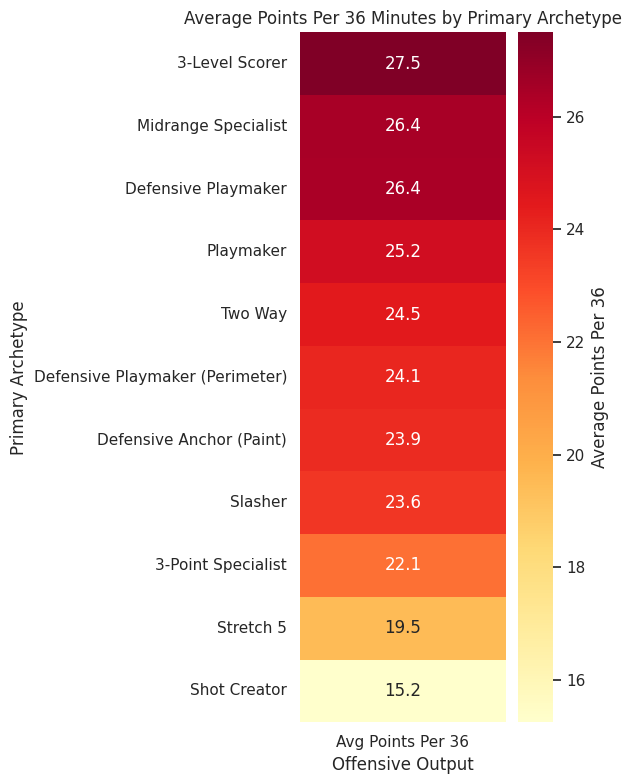

In [42]:
ppg_by_arch = (
    df.groupby(primary_col)["Points Per 36 Minutes"]
      .mean()
      .sort_values(ascending=False)
      .to_frame(name="Avg Points Per 36")
)

print(ppg_by_arch)

plt.figure(figsize=(6, 8))
sns.heatmap(
    ppg_by_arch,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={"label": "Average Points Per 36"}
)

plt.title("Average Points Per 36 Minutes by Primary Archetype")
plt.xlabel("Offensive Output")
plt.ylabel("Primary Archetype")
plt.tight_layout()
plt.show()

In [43]:
#the map below show each player and how their accuracy compares with FG and 3p percentage, Top right players are mainly specialist and overall scorers while
#Slashers(people who don't shoot) and defensive players show that they have high FG(close distance) but low 3p showing an idea of how to catagories players who do not shoot
#the ball well from three but still impact the offensive game

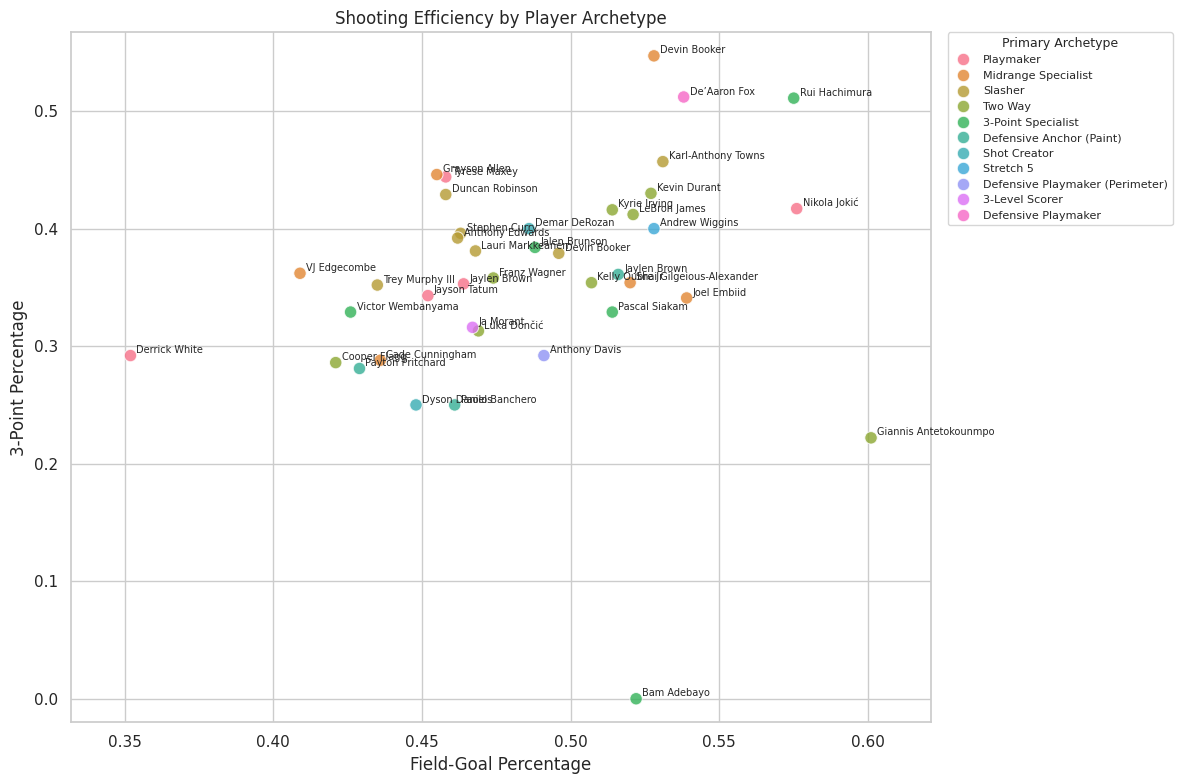

In [44]:
plt.figure(figsize=(12, 8))


ax = sns.scatterplot(
    data=df,
    x="FG% Per 36 Minutes",
    y="3p% Per 36 Minutes",

    hue=primary_col,
    s=80,
    alpha=0.8
)


plt.title("Shooting Efficiency by Player Archetype")
plt.xlabel("Field-Goal Percentage")
plt.ylabel("3-Point Percentage")

plt.xlim(df["FG% Per 36 Minutes"].min() - 0.02,
         df["FG% Per 36 Minutes"].max() + 0.02)
plt.ylim(df["3p% Per 36 Minutes"].min() - 0.02,
         df["3p% Per 36 Minutes"].max() + 0.02)

plt.legend(
    title="Primary Archetype",
    fontsize=8,
    title_fontsize=9,
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

for _, row in df.iterrows():
    x = row["FG% Per 36 Minutes"]
    y = row["3p% Per 36 Minutes"]
    name = row["Player (2025 Rookies)"]
    plt.text(x + 0.002, y + 0.002, name, fontsize=7)

plt.tight_layout()
plt.show()

#Scoring efficecny index for each stat will use the formula

#norm(x)=x - min(x) / max(x) - min(x)​

In [45]:
#we created a scoring effciency index using normalized points, shoot accuracy and the avg of the archetype we already fed the data
#This way we can see what type of players in the future would fall into based on their efficeny as a player as if they are really efficent at scoring we would have a better idea
#of what type of role they would fall into


Weighted Archetype Efficiency (Primary 100%, Secondary 50%):
                                 Weighted Efficiency
Defensive Playmaker                         0.756831
Slasher                                     0.631018
Two Way                                     0.621498
Midrange Specialist                         0.617621
Playmaker                                   0.592563
3-Level Scorer                              0.588121
3-Point Specialist                          0.582344
Stretch Forward                             0.566344
Defensive Playmaker (Perimeter)             0.552134
Shot Creator                                0.541692
Defensive Anchor (Paint)                    0.534829
Movement Shooter                            0.487494
Stretch 5                                   0.483789


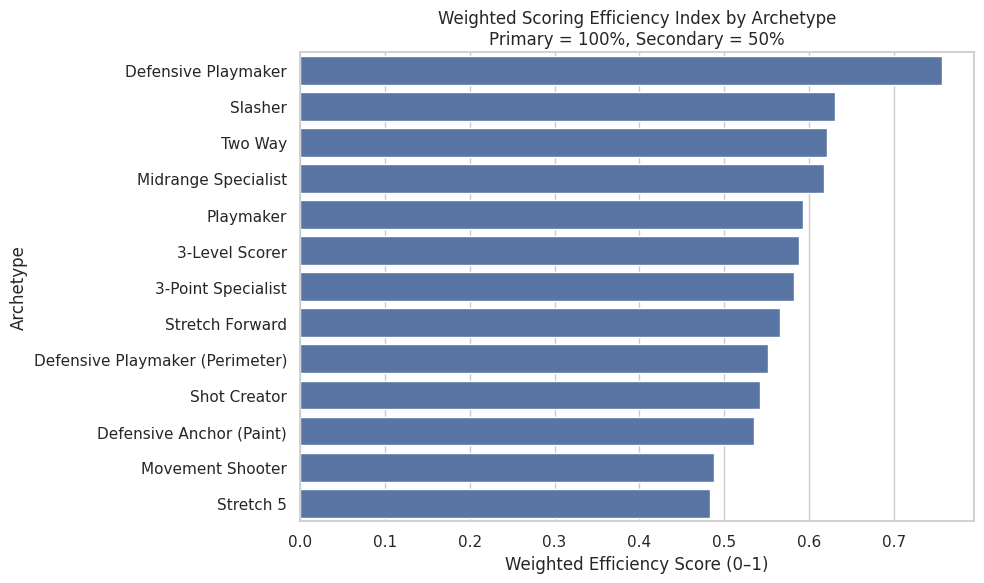

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


eff_features = [
    "Points Per 36 Minutes",
    "FG% Per 36 Minutes",
    "3p% Per 36 Minutes",
    "Free Throw % Per 36 Minutes"
]

eff_df = df.dropna(subset=eff_features).copy()

for col in eff_features:
    col_min = eff_df[col].min()
    col_max = eff_df[col].max()
    eff_df[col + " (norm)"] = (eff_df[col] - col_min) / (col_max - col_min)

norm_cols = [c for c in eff_df.columns if "(norm)" in c]
eff_df["Scoring Efficiency Index"] = eff_df[norm_cols].mean(axis=1)



secondary_cols = [c for c in df.columns if "Secondary" in c]
secondary_col = secondary_cols[0]

eff_df[secondary_col] = eff_df[secondary_col].astype(str).str.strip()

from collections import defaultdict

score_sum = defaultdict(float)
weight_sum = defaultdict(float)

for _, row in eff_df.iterrows():
    idx = row["Scoring Efficiency Index"]
    primary = row[primary_col]
    secondary = row[secondary_col]

    score_sum[primary] += idx * 1.0
    weight_sum[primary] += 1.0

    if secondary != "" and secondary.lower() != "nan":
        score_sum[secondary] += idx * 0.5
        weight_sum[secondary] += 0.5


weighted_arch_scores = {
    arch: score_sum[arch] / weight_sum[arch]
    for arch in score_sum
}

weighted_df = (
    pd.DataFrame.from_dict(weighted_arch_scores, orient="index", columns=["Weighted Efficiency"])
      .sort_values(by="Weighted Efficiency", ascending=False)
)

print("\nWeighted Archetype Efficiency (Primary 100%, Secondary 50%):")
print(weighted_df)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=weighted_df.reset_index(),
    x="Weighted Efficiency",
    y="index",
    orient="h"
)

plt.title("Weighted Scoring Efficiency Index by Archetype\nPrimary = 100%, Secondary = 50%")
plt.xlabel("Weighted Efficiency Score (0–1)")
plt.ylabel("Archetype")
plt.tight_layout()
plt.show()


In [47]:
# 4. Defensive Visualizations

In [48]:
#The plot compares blocks and defense rebounds which are important stats for defensive players as we can see that most players from the
#two way player - meaning that they play defense and offensive and defensive specalist are in the upper right while many guards and perimeter players stay closer to orgin
#using these stats we can see if a player is a positive or a negative when it comes to defense

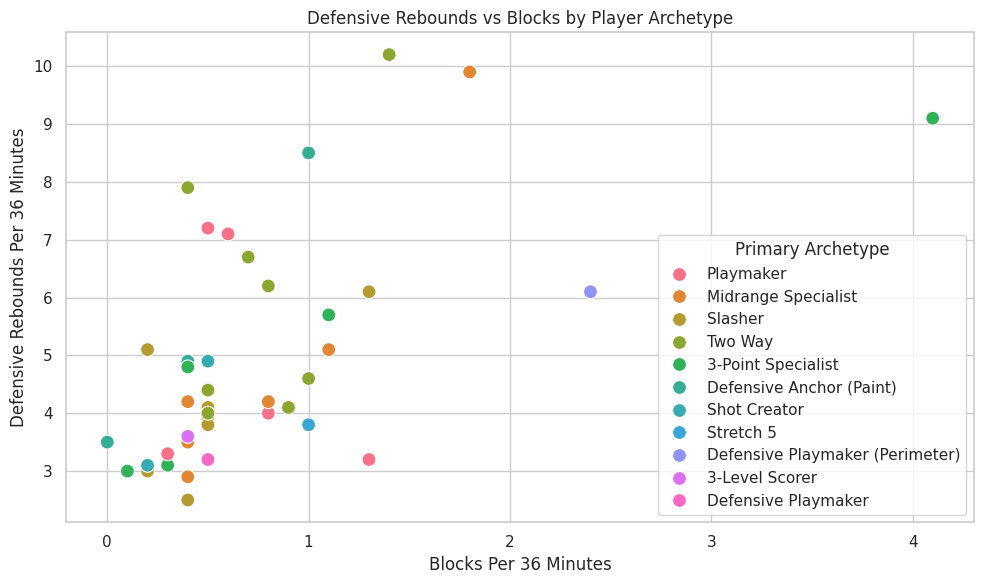

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Blocks Per 36 Minutes",
    y="Defensive Rebounds Per 36 Minutes",
    hue=primary_col,
    s=100
)

plt.title("Defensive Rebounds vs Blocks by Player Archetype")
plt.xlabel("Blocks Per 36 Minutes")
plt.ylabel("Defensive Rebounds Per 36 Minutes")
plt.tight_layout()
plt.show()

In [50]:
#Allows us to see how players catagories in certain catagories should have an impact on defense as in many cases in the NBA
#teams would put their scoreres on the other teams weakest players on defense so they can reserve energy
#by doing this we can see who stands out on defense and who to use manly on defense and it allows us to catagories new players based on how effiecent their defense is


Average Defensive Efficiency Index by Archetype:
Primary Archetype
Defensive Playmaker (Perimeter)    0.462077
Two Way                            0.323861
Playmaker                          0.300441
Shot Creator                       0.297094
Midrange Specialist                0.293548
3-Point Specialist                 0.285921
Stretch 5                          0.267207
Defensive Anchor (Paint)           0.204447
Defensive Playmaker                0.182065
Slasher                            0.168040
3-Level Scorer                     0.135695
Name: Defensive Efficiency Index, dtype: float64


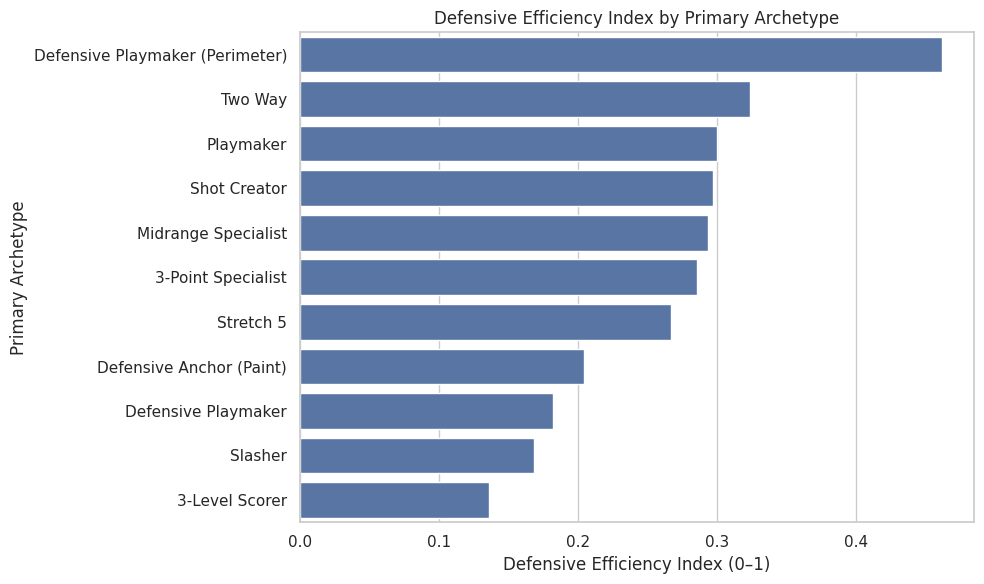

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


def_features = [
    "Defensive Rebounds Per 36 Minutes",
    "Blocks Per 36 Minutes",
    "Steals Per 36 Minutes"
]

def_df = df.dropna(subset=def_features).copy()

for col in def_features:
    col_min = def_df[col].min()
    col_max = def_df[col].max()
    def_df[col + " (norm)"] = (def_df[col] - col_min) / (col_max - col_min)

def_norm_cols = [c for c in def_df.columns if "(norm)" in c]
def_df["Defensive Efficiency Index"] = def_df[def_norm_cols].mean(axis=1)

def_by_arch = (
    def_df.groupby(primary_col)["Defensive Efficiency Index"]
          .mean()
          .sort_values(ascending=False)
)

print("\nAverage Defensive Efficiency Index by Archetype:")
print(def_by_arch)

def_plot = def_by_arch.to_frame().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=def_plot,
    x="Defensive Efficiency Index",
    y=primary_col,
    orient="h"
)

plt.title("Defensive Efficiency Index by Primary Archetype")
plt.xlabel("Defensive Efficiency Index (0–1)")
plt.ylabel("Primary Archetype")
plt.tight_layout()
plt.show()


In [52]:
#Finally this allows us to catagories players based on stats using probability classifcation as we can see based on stats what type of playstyle fits them
#heres an example with

#based on past scoring effieceny and defensie efficeny as certain stats like points, rebounds etc we can use those stats and their classification to give a probabiity to
#random players based on the past data we fed to the model which allows us to see what some players archyetype would be

Columns now in df:
 ['Scoring Efficiency Index', 'Defensive Efficiency Index']

Centroids head:
                                  Points Per 36 Minutes  FG% Per 36 Minutes  \
Primary Archetype                                                            
3-Level Scorer                               27.500000            0.467000   
3-Point Specialist                           22.080000            0.505000   
Defensive Anchor (Paint)                     23.933333            0.468667   
Defensive Playmaker                          26.400000            0.538000   
Defensive Playmaker (Perimeter)              24.100000            0.491000   

                                 3p% Per 36 Minutes  Scoring Efficiency Index  \
Primary Archetype                                                               
3-Level Scorer                             0.316000                  0.566344   
3-Point Specialist                         0.310600                  0.592200   
Defensive Anchor (Paint)        

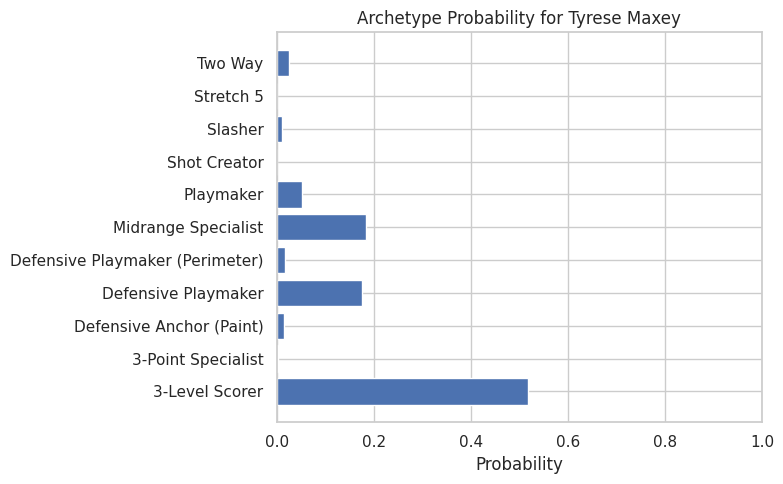

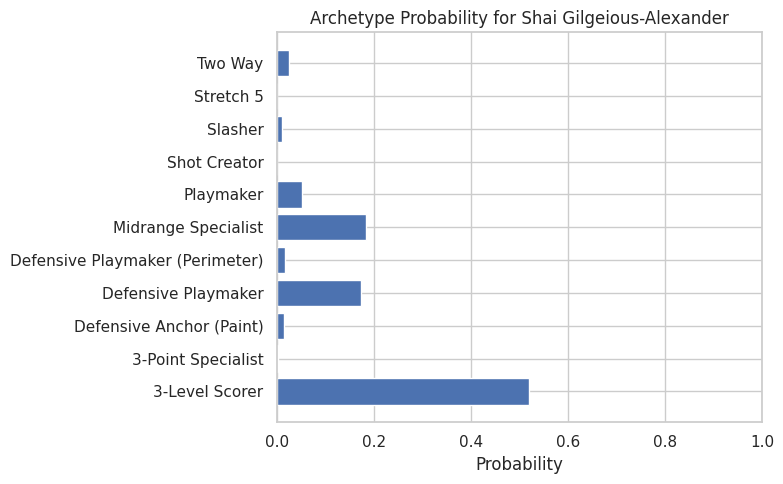

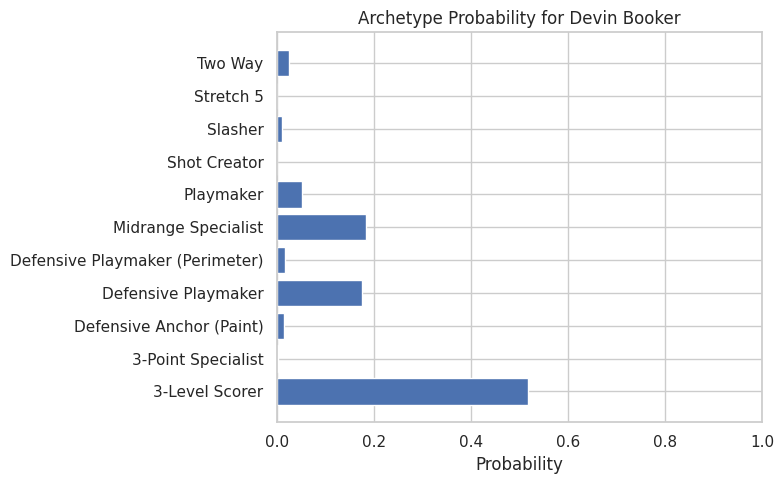

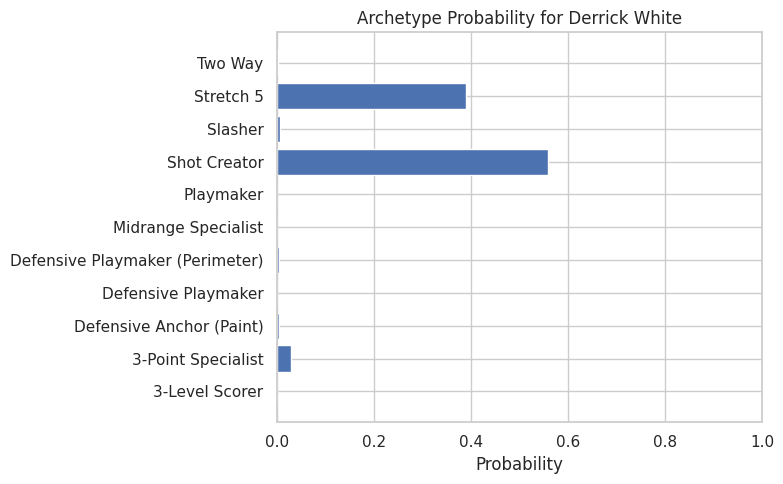

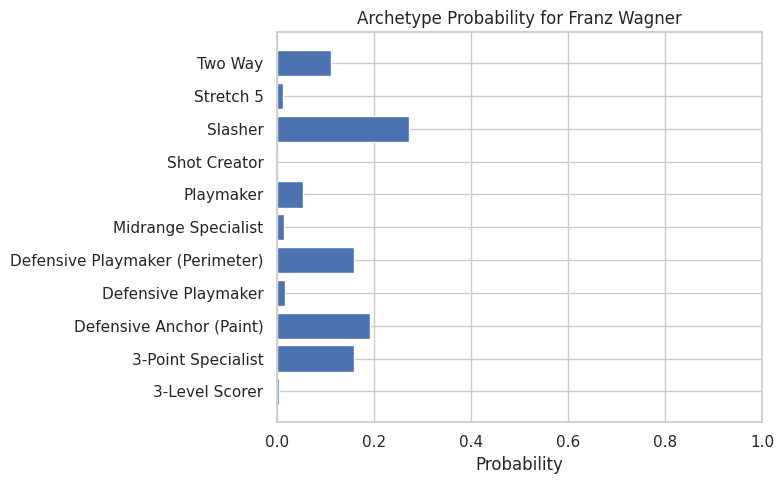

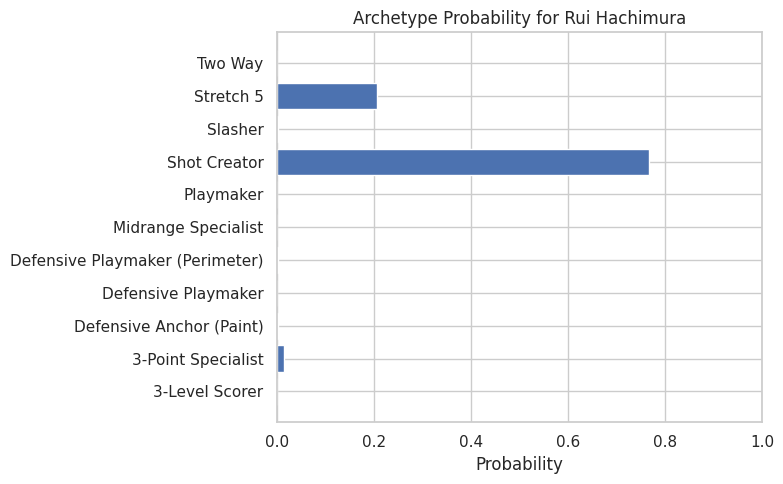

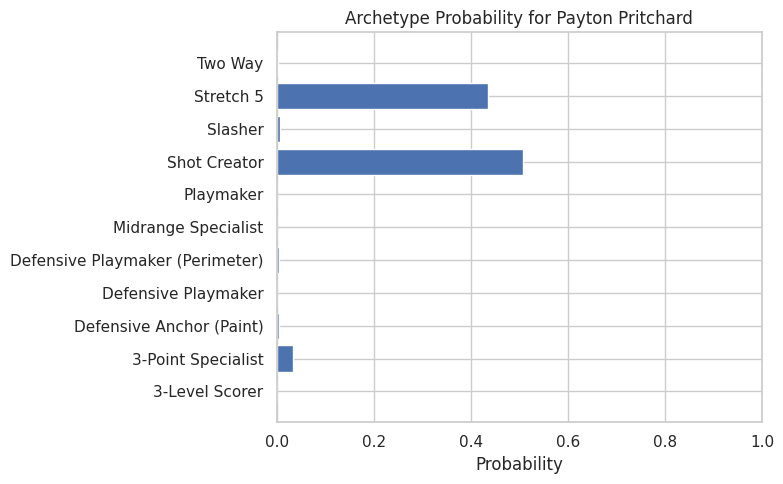

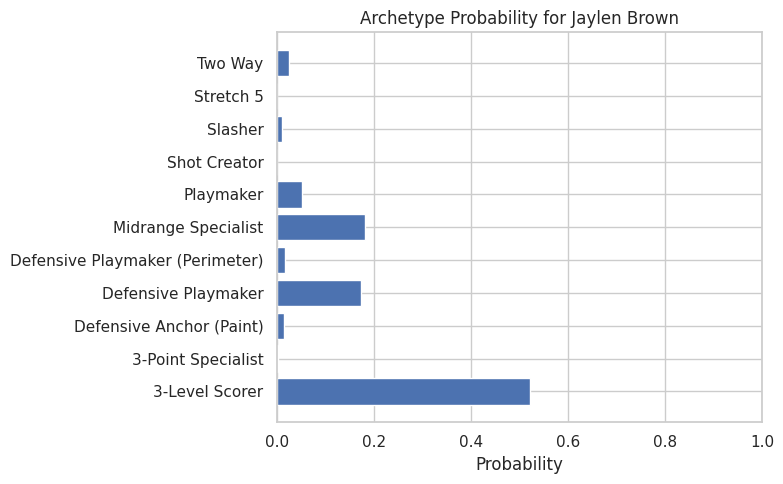

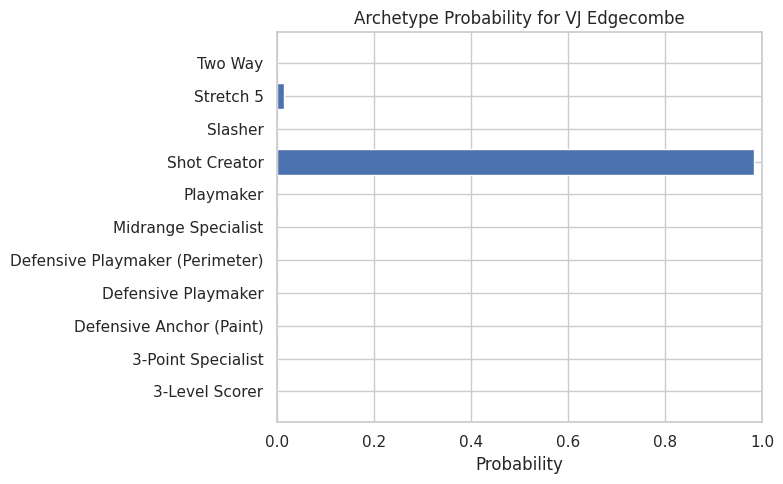

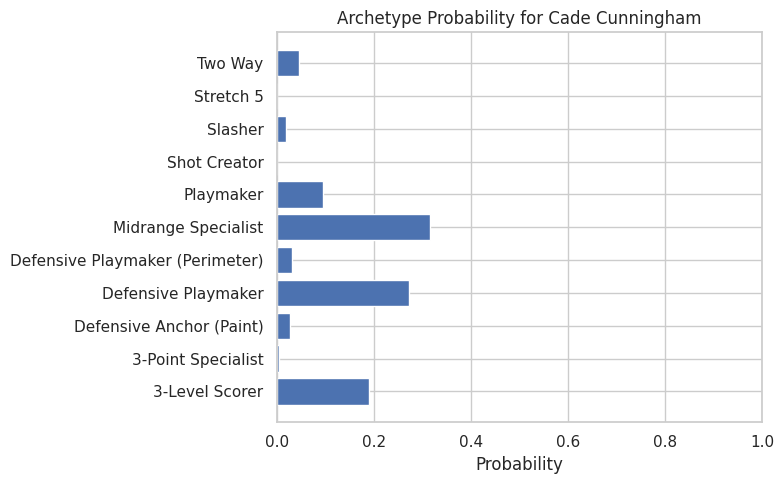

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

num_cols = [
    "Points Per 36 Minutes",
    "FG% Per 36 Minutes",
    "3p% Per 36 Minutes",
    "Free Throw % Per 36 Minutes",
    "Offensive Rebounds Per 36 Minutes",
    "Defensive Rebounds Per 36 Minutes",
    "Steals Per 36 Minutes",
    "Blocks Per 36 Minutes",
    "Turnovers Per 36 Minutes"
]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

score_feats = [
    "Points Per 36 Minutes",
    "FG% Per 36 Minutes",
    "3p% Per 36 Minutes",
    "Free Throw % Per 36 Minutes"
]

for col in score_feats:
    col_min = df[col].min()
    col_max = df[col].max()
    df[col + " (score_norm)"] = (df[col] - col_min) / (col_max - col_min)

score_norm_cols = [c for c in df.columns if c.endswith("(score_norm)")]
df["Scoring Efficiency Index"] = df[score_norm_cols].mean(axis=1)

def_feats = [
    "Defensive Rebounds Per 36 Minutes",
    "Blocks Per 36 Minutes",
    "Steals Per 36 Minutes"
]

for col in def_feats:
    col_min = df[col].min()
    col_max = df[col].max()
    df[col + " (def_norm)"] = (df[col] - col_min) / (col_max - col_min)

def_norm_cols = [c for c in df.columns if c.endswith("(def_norm)")]
df["Defensive Efficiency Index"] = df[def_norm_cols].mean(axis=1)

print("Columns now in df:\n", [c for c in df.columns if "Efficiency" in c])

class_features = [
    "Points Per 36 Minutes",
    "FG% Per 36 Minutes",
    "3p% Per 36 Minutes",
    "Scoring Efficiency Index",
    "Defensive Efficiency Index"
]

base_df = df.dropna(subset=class_features + [primary_col]).copy()

centroids = base_df.groupby(primary_col)[class_features].mean()
print("\nCentroids head:\n", centroids.head())

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

def classify_player(row):
    player_vec = row[class_features].values.astype(float)

    scores = []
    for arch in centroids.index:
        arch_vec = centroids.loc[arch].values.astype(float)
        dist = np.linalg.norm(player_vec - arch_vec)
        score = -dist
        scores.append(score)

    probs = softmax(np.array(scores))
    return dict(zip(centroids.index, probs))

top10 = base_df.head(10).copy()
top10["Archetype Probabilities"] = top10.apply(classify_player, axis=1)

top10["Primary Predicted"] = top10["Archetype Probabilities"].apply(
    lambda d: max(d, key=d.get)
)

top10["Secondary Predicted"] = top10["Archetype Probabilities"].apply(
    lambda d: sorted(d, key=d.get, reverse=True)[1]
)

print("\nTop 10 rookies with predicted archetypes:")
print(top10[["Player (2025 Rookies)", primary_col, "Primary Predicted", "Secondary Predicted"]])

for idx, row in top10.iterrows():
    probs = row["Archetype Probabilities"]
    arches = list(probs.keys())
    vals = list(probs.values())

    plt.figure(figsize=(8, 5))
    plt.barh(arches, vals)
    plt.title(f"Archetype Probability for {row['Player (2025 Rookies)']}")
    plt.xlabel("Probability")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()
